In [16]:
import os
import glob
import pydicom
import nibabel as nib
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import numpy as np

%load_ext autoreload
%autoreload 2

import sys
sys.path.append("..")

from utils.dcm_utils import rescale_img_to_hu

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
DATA_DIR = "/Volumes/SSD970/"

TRAIN_SEG_DIR = os.path.join(DATA_DIR, "segmentations")
TRAIN_IMAGE_DIR = os.path.join(DATA_DIR, "train_images")

In [31]:
patient_id = "1.2.826.0.1.3680043.1363"
nii_path = os.path.join(TRAIN_SEG_DIR, f"{patient_id}.nii")

seg_mask = nib.load(nii_path)
print(seg_mask.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 512 512 199   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.         0.5839844  0.5839844  1.         0.         0.
  0.         0.       ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : aligned
sform_code      : scanner
quatern_b       : -0.0
quatern_c       : 1.0
quatern_d       : 0.0
qoffset_x       : 149.20801
qoffset_y       : 51.791992
qoffse

In [32]:
seg_mask_img = seg_mask.get_fdata()
seg_mask_img = np.rot90(seg_mask_img, axes=(0, 1))

In [ ]:
# dcm 에서 z 가 작아지면 axis=z 로 flip 한번 해줘야 된다.

In [33]:
print(f"min {seg_mask_img.min()} max {seg_mask_img.max()}")

min 0.0 max 10.0


In [34]:
seg_mask_img.shape

(512, 512, 199)

In [35]:
for i in range(seg_mask_img.shape[2]):
    print(f"{i} {seg_mask_img[:, :, i].min()} - {seg_mask_img[:, :, i].max()}")

0 0.0 - 10.0
1 0.0 - 10.0
2 0.0 - 10.0
3 0.0 - 10.0
4 0.0 - 10.0
5 0.0 - 10.0
6 0.0 - 10.0
7 0.0 - 10.0
8 0.0 - 10.0
9 0.0 - 10.0
10 0.0 - 10.0
11 0.0 - 10.0
12 0.0 - 10.0
13 0.0 - 10.0
14 0.0 - 10.0
15 0.0 - 10.0
16 0.0 - 9.0
17 0.0 - 9.0
18 0.0 - 9.0
19 0.0 - 9.0
20 0.0 - 9.0
21 0.0 - 9.0
22 0.0 - 9.0
23 0.0 - 9.0
24 0.0 - 9.0
25 0.0 - 9.0
26 0.0 - 9.0
27 0.0 - 9.0
28 0.0 - 9.0
29 0.0 - 9.0
30 0.0 - 9.0
31 0.0 - 9.0
32 0.0 - 9.0
33 0.0 - 9.0
34 0.0 - 9.0
35 0.0 - 8.0
36 0.0 - 8.0
37 0.0 - 8.0
38 0.0 - 8.0
39 0.0 - 8.0
40 0.0 - 8.0
41 0.0 - 8.0
42 0.0 - 8.0
43 0.0 - 8.0
44 0.0 - 8.0
45 0.0 - 8.0
46 0.0 - 8.0
47 0.0 - 8.0
48 0.0 - 8.0
49 0.0 - 8.0
50 0.0 - 8.0
51 0.0 - 8.0
52 0.0 - 8.0
53 0.0 - 7.0
54 0.0 - 7.0
55 0.0 - 7.0
56 0.0 - 7.0
57 0.0 - 7.0
58 0.0 - 7.0
59 0.0 - 7.0
60 0.0 - 7.0
61 0.0 - 7.0
62 0.0 - 7.0
63 0.0 - 7.0
64 0.0 - 7.0
65 0.0 - 7.0
66 0.0 - 7.0
67 0.0 - 7.0
68 0.0 - 6.0
69 0.0 - 6.0
70 0.0 - 6.0
71 0.0 - 6.0
72 0.0 - 6.0
73 0.0 - 6.0
74 0.0 - 6.0
75 0.0 - 6.0
76 0.0

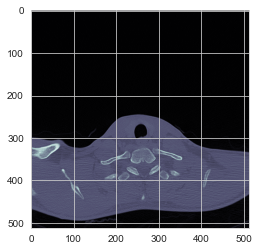

In [39]:
slice = 29
dcm = pydicom.dcmread(os.path.join(TRAIN_IMAGE_DIR, f"{patient_id}/{slice + 1}.dcm"))
slice_img = rescale_img_to_hu(dcm)
plt.imshow(slice_img, cmap='bone')
plt.show()

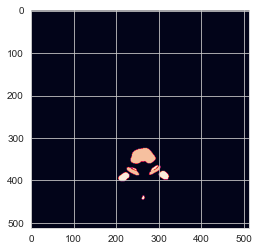

In [42]:
plt.imshow(seg_mask_img[:, :, slice])
plt.show()

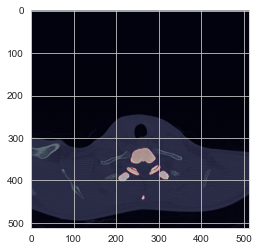

In [41]:
plt.imshow(slice_img, cmap='bone')
plt.imshow(seg_mask_img[:, :, slice], alpha=0.5)
plt.show()